Baseball Case Study:
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.
There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [121]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [40]:
#importing the Dataframe
df=pd.read_csv('Basketball_data.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape
#the shape of Dataframe is 30 rows and 17 columns

(30, 17)

In [4]:
#this is basically used to display the complete row of dataframe
pd.set_option('display.max_rows',None)

In [5]:
df.info()
#Here there is no null value in any of the columns and there datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.isna().sum()
#As we can see there is no null present in the dataframe.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

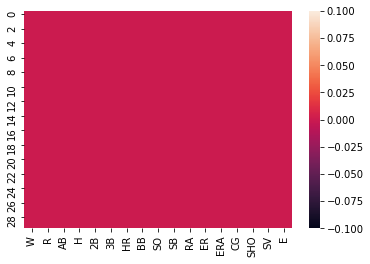

In [178]:
#checking the null using heatmap
sns.heatmap(df.isnull())

In [36]:
#Discribe the Dataframe
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
#the Mean and median(50%) looks approx equal so there is less chance of outliers in the features.
#the Standerd daviation looks not normal for many of the features.
#the diffrence between values of min,25%,50%,75% and max is looks normal for the features.

In [9]:
#As we can see there is no catagorical columns in the features so there is no need to perform the encoding for any features.

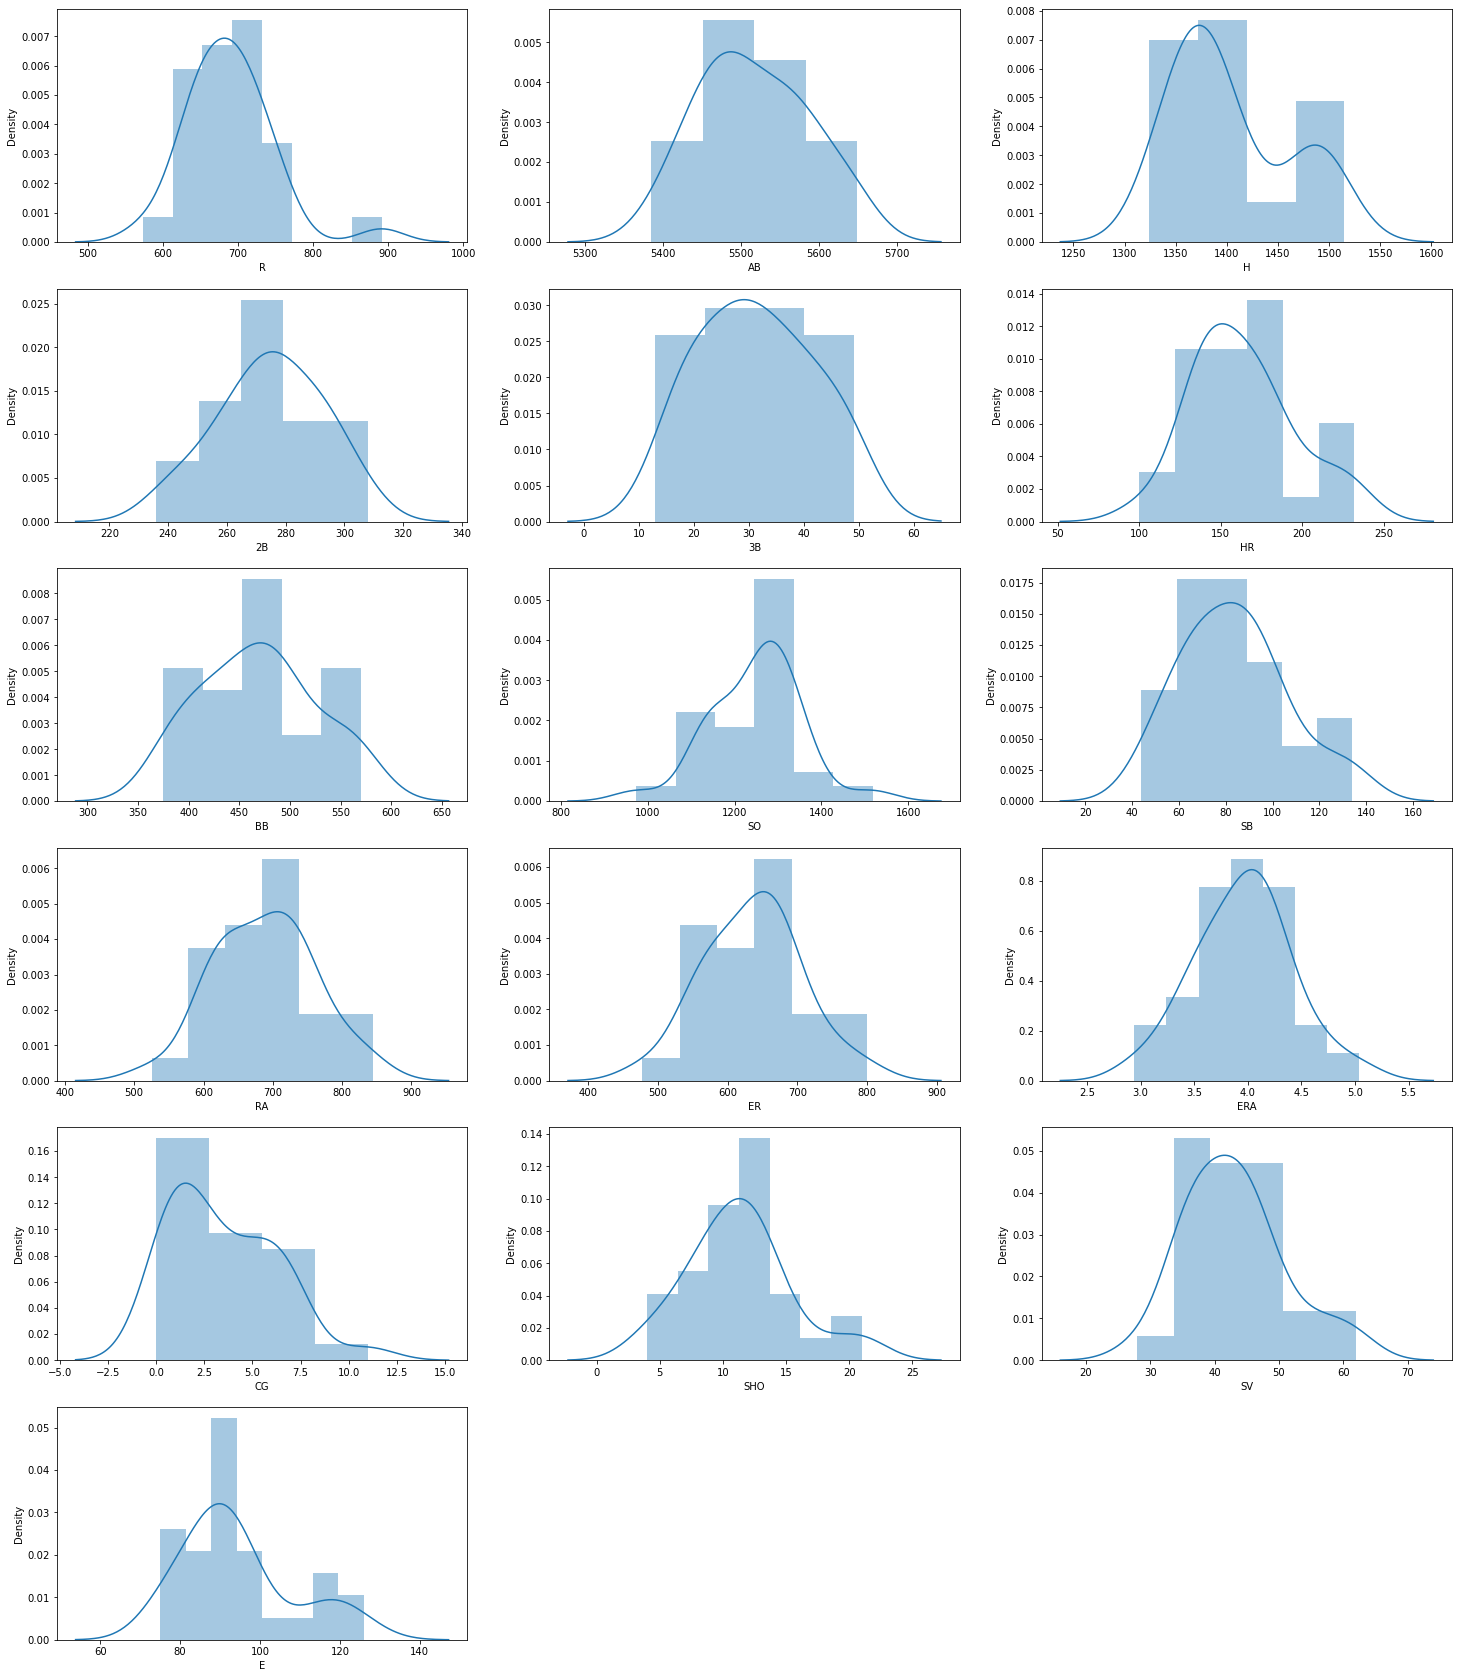

In [177]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,30),facecolor='white')
pltnum=1

for column in df.iloc[:,1:]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [15]:
#As per the distplot data distribution looks normal.there is no skewness shown in the features

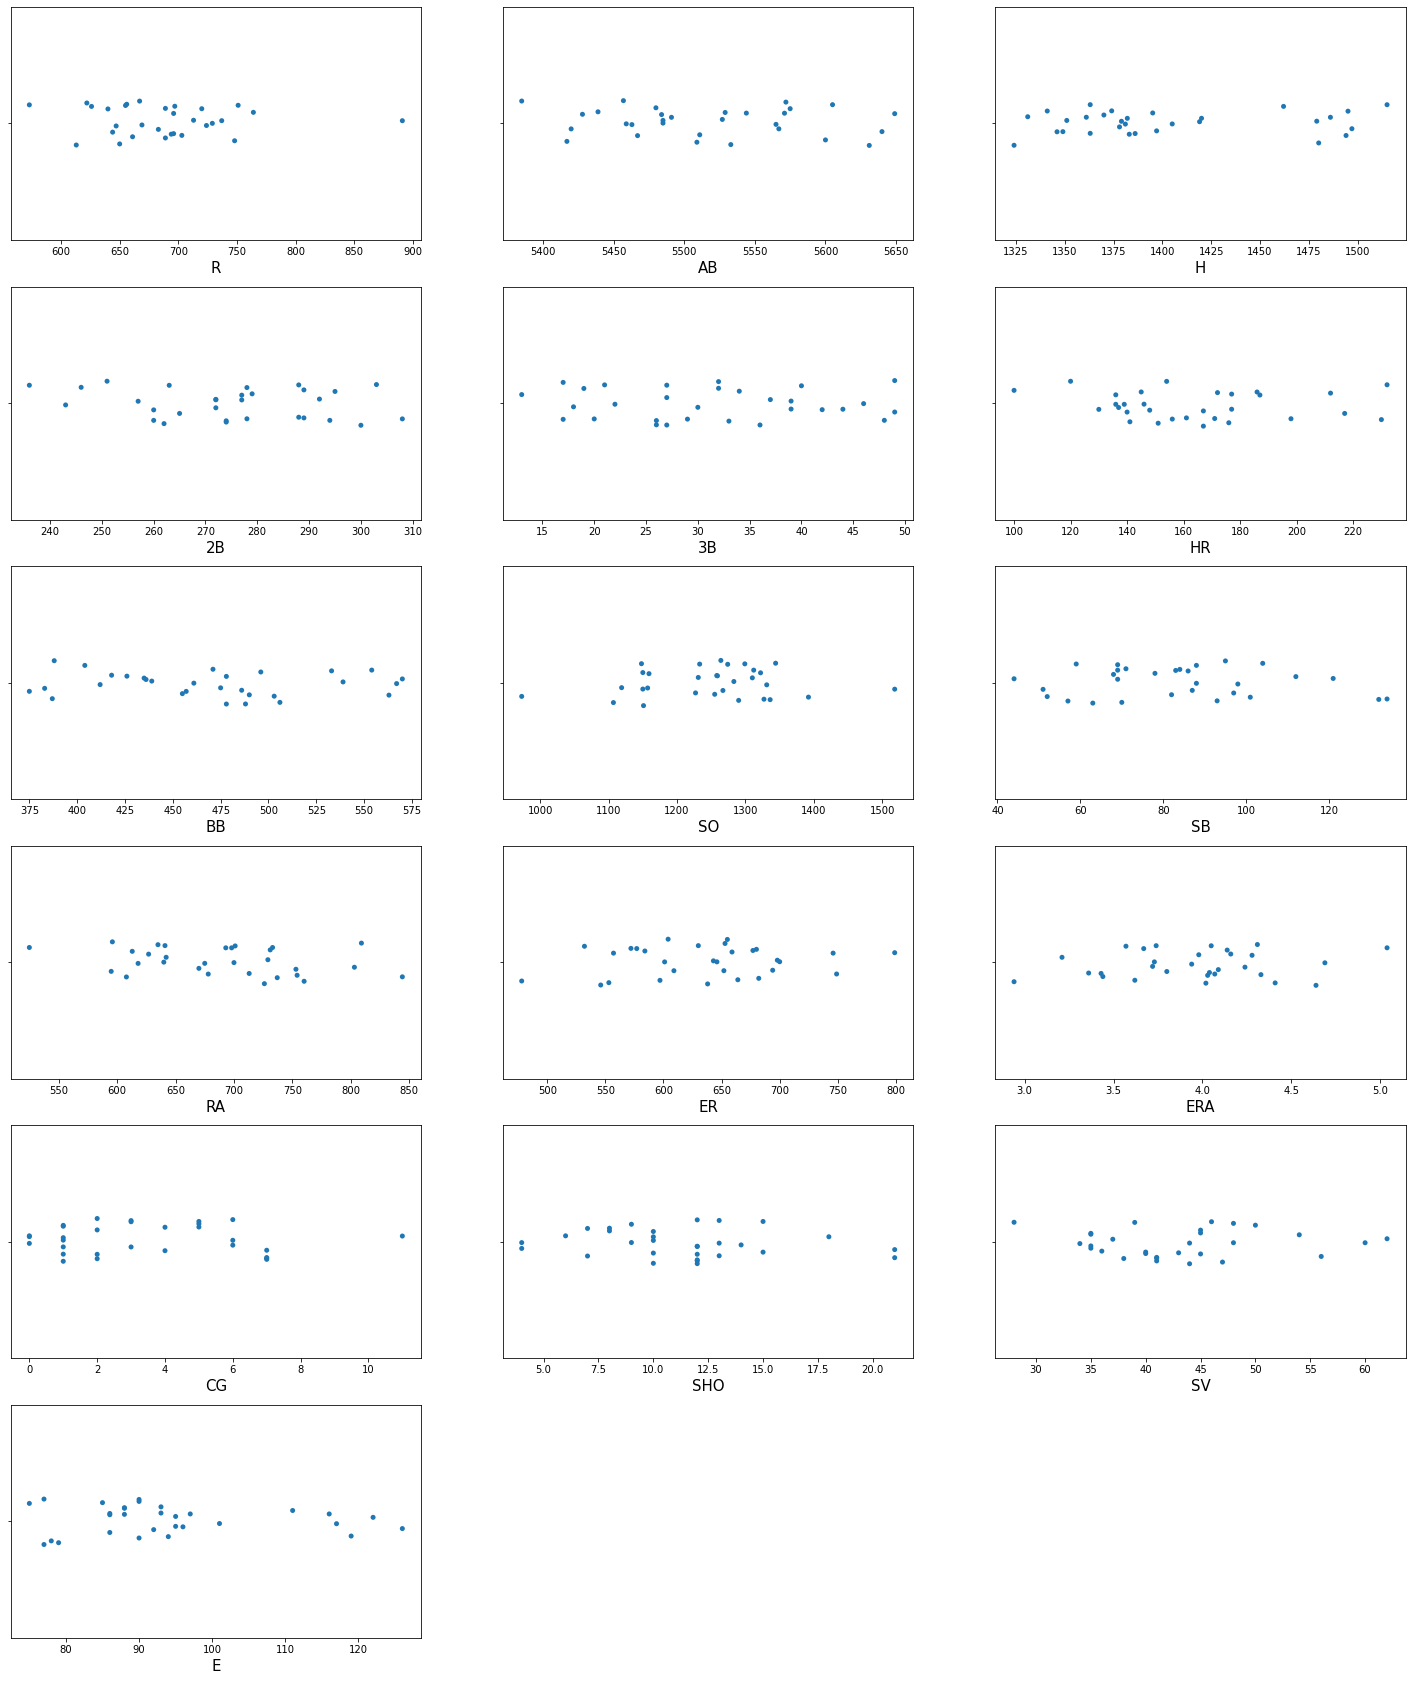

In [180]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,30),facecolor='white')
pltnum=1

for column in df.iloc[:,1:]:
    if pltnum <= 18:
        plt.subplot(6,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    pltnum +=1
plt.show()    

In [ ]:
#from strip plot also data distribution looks normal.

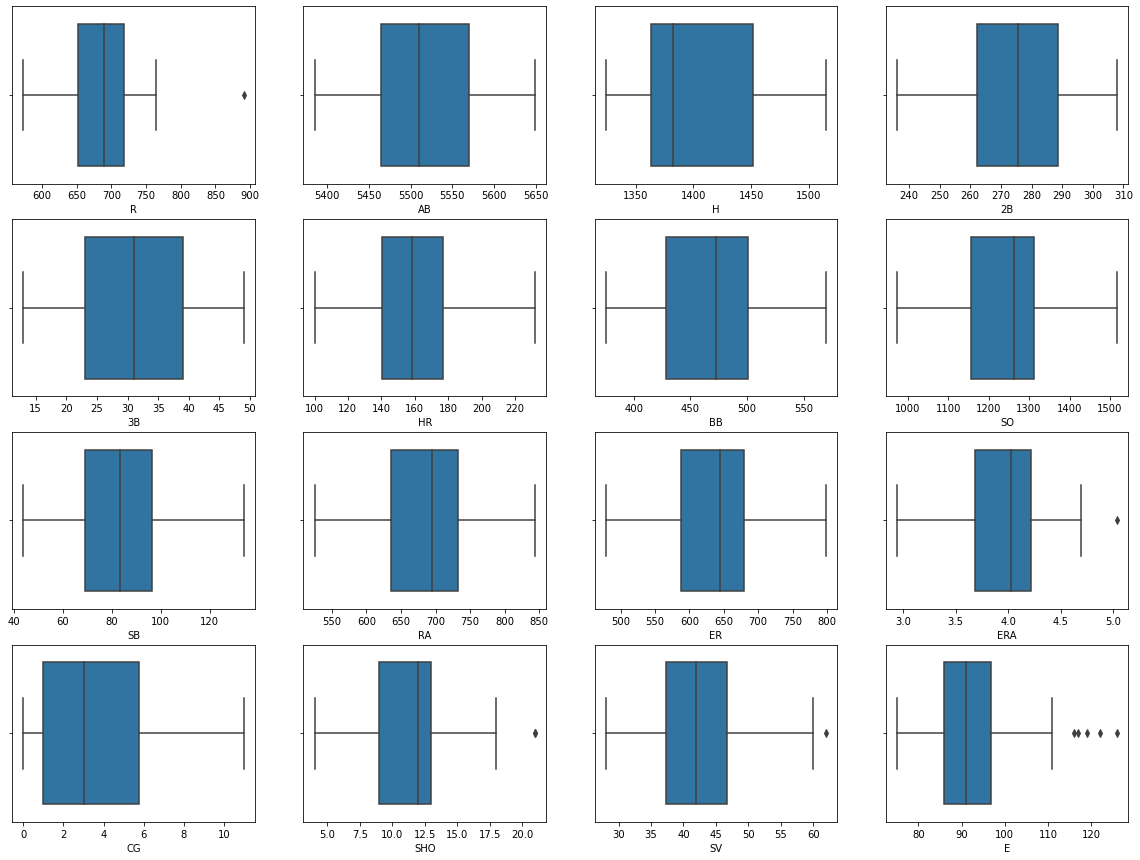

In [19]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,1:]:
    if pltnum <= 16:
        plt.subplot(4,4,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show() 

In [ ]:
#there is very less outliers is looking in the features which can be taken for further process as the data is very less the df.

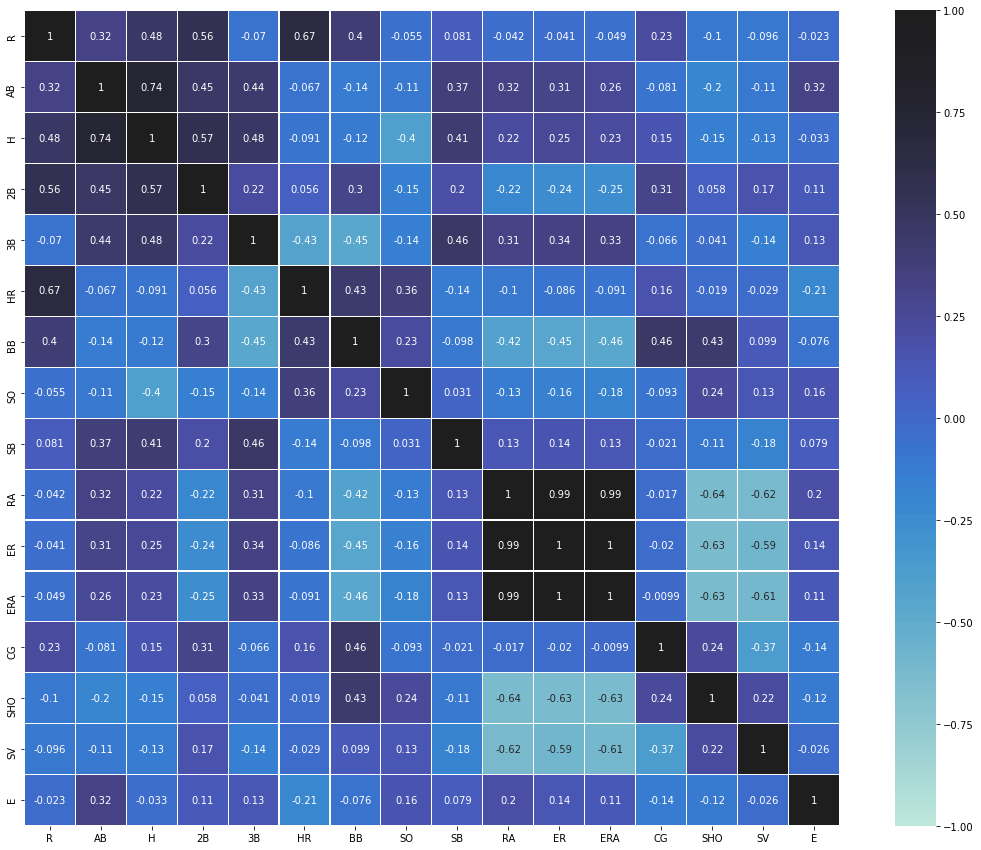

In [22]:
#Checking multicilliniary using heatmap

corr_df=df.iloc[:,1:].abs().corr()

plt.figure(figsize=(20,15))

sns.heatmap(corr_df,vmin=-1,vmax=1,center=True,square=True,annot=True,fmt='.2g',linewidths=0.1)
plt.show()

In [ ]:
#as we can see there is issue of multi colliniarity between multiple features.
#features are:RA and ER,RA and ERA,ER and ERA,(R,AB and H)
#we can cross check the same using the variance inflaction factor.

In [124]:
#now checking the correlation between features and target.
df_corr=df.abs().corr()
df_corr['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [ ]:
#there is also the issue of skewness is present between multiple columns 
#coulmns are SV,ER,RA,ERA

In [125]:
#sepeprating the dataframe in x and y to perform the power transfrom and scalar.
x=df.drop(columns='W',axis=1)
y=df['W']

In [126]:
#defining x value to other variable
x_new=x.iloc[:,[9,10,11,14]]
x_new.head()

,RA,ER,ERA,SV
0,641,601,3.73,56
1,700,653,4.07,45
2,640,584,3.67,38
3,701,643,3.98,37
4,803,746,4.64,35


In [127]:
#performing the power transform using yeo-johnson method
x_new=pd.DataFrame(power_transform(x_new,method='yeo-johnson'))

In [128]:
#replacing the transformed value in dataframe
x[['RA','ER','ERA','SV']]=x_new

In [129]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,-0.660331,-0.497425,-0.500893,2,8,1.546378,88
1,696,5467,1349,277,44,156,439,1264,70,0.175465,0.257974,0.261806,2,12,0.360444,86
2,669,5439,1395,303,29,141,533,1157,86,-0.674621,-0.746906,-0.636459,11,10,-0.607594,79
3,622,5533,1381,260,27,136,404,1231,68,0.189512,0.113575,0.060804,7,9,-0.764453,101
4,689,5605,1515,289,49,151,455,1259,83,1.603228,1.582654,1.520959,7,12,-1.095010,86


In [77]:
#using standerd scalar to scale the data
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [78]:
#Using VIF to again check the multicolliniarity
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif['features']=x.columns

In [79]:
#displaying vif
vif

,vif,features
0,11.010321,R
1,13.481794,AB
2,9.756963,H
3,3.928851,2B
4,3.253227,3B
5,10.417438,HR
6,3.658500,BB
7,2.882073,SO
8,2.051860,SB
9,198.900311,RA


In [ ]:
#here we can see the the multicollinearity between multiple features
#(R,AB,H) and (RA,ER,ERA)

In [ ]:
#we can do the model building before removing the skewness.
#accuracy of 5 models given below without removing multicolliniaruty
#Linear reggression:91.53%
#KNeighborsRegressor:40.59%
#RandomForestRegressor:40.72%
#AdaBoostRegressor:41.53%
#SVR:9.31%

In [130]:
#now removing the multicollinerty from the features
#delting the columns having high vif score i.e AB and ER
x=x.drop(columns=['AB','ER'],axis=1)

In [132]:
x.head()

,R,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,-0.660331,-0.500893,2,8,1.546378,88
1,696,1349,277,44,156,439,1264,70,0.175465,0.261806,2,12,0.360444,86
2,669,1395,303,29,141,533,1157,86,-0.674621,-0.636459,11,10,-0.607594,79
3,622,1381,260,27,136,404,1231,68,0.189512,0.060804,7,9,-0.764453,101
4,689,1515,289,49,151,455,1259,83,1.603228,1.520959,7,12,-1.095010,86


In [133]:
#using standerd scalar to scale the data
scalar=StandardScaler()
x_data=scalar.fit_transform(x)

In [134]:
#Using VIF to again check the multicolliniarity
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif['features']=x.columns

In [135]:
vif

,vif,features
0,8.388985,R
1,4.200406,H
2,3.631011,2B
3,3.042084,3B
4,6.677205,HR
5,3.634121,BB
6,2.631629,SO
7,1.776253,SB
8,89.127068,RA
9,88.146297,ERA


In [ ]:
#Now checking train_test_split after removing the multicolliniarity issue using vif.

In [136]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_s=r2_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
    
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)     

Best Accuracy is : 93.22%
The Best Random State is : 118


In [137]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.25,random_state =118)

In [155]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print(f"The accuracy of the model using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predrfr=rfr.predict(x_test)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_predada=ada.predict(x_test)
print(f"The accuracy of the model using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train,y_train)
y_predsvr=svr.predict(x_test)
print(f"The accuracy of the model using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression is: 93.22%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model using KNeighborsRegressor is: 41.01%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 52.67%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model using AdaBoostRegressor is: 58.04%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model using SVR is: 4.41%



In [143]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x_data,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x_data,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x_data,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x_data,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x_data,y,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: -57.96%


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 61.73%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: -18.63%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: -77.35%


===================Cross Validation Score of SVR========================
Cross validation for the KNN Classifier is: -37.63%



In [144]:
# lib
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
#Regularation Process

In [152]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le=Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predictlasso = le.predict(x_test)
le.score(x_train,y_train)
print(f"The accuracy of the model using Lasso is: {r2_score(y_test,predictlasso)*100:.2f}%\n")


# Ridge model
print('\n==========Accuracy of Ridge===========')
rg =Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predictridge = rg.predict(x_test)
print(f"The accuracy of the model using Ridge is: {r2_score(y_test,predictridge)*100:.2f}%\n")


# Elastic model
print('\n==========Accuracy of Elastic===========')
el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predictel = el.predict(x_test)
print(f"The accuracy of the model using ElasticNet is: {r2_score(y_test,predictel)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso is: 93.31%


==========Accuracy of Ridge===========
The accuracy of the model using Ridge is: 93.24%


==========Accuracy of Elastic===========
The accuracy of the model using ElasticNet is: 93.46%



In [151]:
print('\n==========Cross Validation Score of Lasso===========')
cvs_le=cross_val_score(le,x_data,y,cv=5)
print(f"Cross validation for the LASSO is: {cvs_le.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Ridge===========')
cvs_rg=cross_val_score(rg,x_data,y,cv=5)
print(f"Cross validation for the Ridge is: {cvs_rg.mean()*100:.2f}%\n")


print('\n==========Cross Validation Score of ElasticNet===========')
cvs_el=cross_val_score(el,x_data,y,cv=5)
print(f"Cross validation for the ElasticNet is: {cvs_el.mean()*100:.2f}%\n")


==========Cross Validation Score of Lasso===========
Cross validation for the LASSO is: 61.78%


==========Cross Validation Score of Ridge===========
Cross validation for the Ridge is: 61.74%


==========Cross Validation Score of ElasticNet===========
Cross validation for the ElasticNet is: 61.89%



In [ ]:
#Here we can see that the Accracy and Cross validation scores:
#Lasso is:93.31%  Cross validation score:61.78%
#diffrence:31.53

#Ridge is:93.24%  Cross validation score:61.74%
#diffrence:31.5

#ElasticNet:93.46% Cross validation score:61.89%
#diffrence:31.57

#here we can see the diifference is approx same for all the model.we can use hyper parameter tuning for all the models.

In [ ]:
#Performing the huperparameter Tuning Using GridSearchCV:

In [156]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

In [157]:
#for Lasso
lasso_hp=GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'cyclic'}

In [162]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le=Lasso(alpha=0.0001,selection='random')
le.fit(x_train,y_train)
predictlasso = le.predict(x_test)
le.score(x_train,y_train)
print(f"The accuracy of the model using Lasso is: {r2_score(y_test,predictlasso)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso is: 94.09%



In [ ]:
#the accuracy has been increased by performing the hyper paramter tuning.

In [163]:
# Ridge Regrssion param
param_r ={'alpha':[0.1,0.01,0.001,0.0001],
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [166]:
#for Ridge
ringe_hp=GridSearchCV(Ridge(),param_r,cv=5)
ringe_hp.fit(x_train,y_train)
ringe_hp.best_params_

{'alpha': 0.1, 'solver': 'saga'}

In [169]:
# Ridge model after hyper parameter tuning
print('\n==========Accuracy of Ridge===========')
rg =Ridge(alpha=0.1,solver='saga')
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predictridge = rg.predict(x_test)
print(f"The accuracy of the model using Ridge is: {r2_score(y_test,predictridge)*100:.2f}%\n")


==========Accuracy of Ridge===========
The accuracy of the model using Ridge is: 92.37%



In [ ]:
#the accuracy of Ridge has been decreased by performing the hyper paramter tuning.

In [ ]:
#Lasso Regrssion model is giving higher accuracy so we are selecting this model.

In [170]:
#Saving the Model
import joblib

In [171]:
joblib.dump(le,'Baseball_pridiction_Model.pkl')

['Baseball_pridiction_Model.pkl']

In [172]:
#loding model to file

job=joblib.load("Baseball_pridiction_Model.pkl")
job

Lasso(alpha=0.0001, selection='random')

In [ ]:
#This Complete our Model Building.